In [1]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
    """
    Cria um dataset para regressão com função geradora com
    inclinação e interceptação do eixo vertical parametrizados.
    """
    X = np.random.uniform(size=(n,1))
    AUX = np.random.rand(n,1)-0.5
    y = X*slop+intercept + AUX*0.1
    y = y.flatten()
    return X, y

slop = 0.5
intercept = 0.2
Xtr, ytr = criaDatasetRegressão(n=20, slop=slop, intercept=intercept)
Xtr.T, ytr.T

(array([[0.82271035, 0.74722967, 0.33815912, 0.61405359, 0.2825465 ,
         0.17445071, 0.08605168, 0.44462814, 0.74021935, 0.23061388,
         0.95322027, 0.21284962, 0.55947394, 0.49131475, 0.86497668,
         0.7520515 , 0.06272828, 0.5823933 , 0.42562421, 0.21943387]]),
 array([0.64489707, 0.56917153, 0.37317643, 0.52138348, 0.30918667,
        0.33680289, 0.27999733, 0.40751221, 0.57383083, 0.33896014,
        0.66104393, 0.34349535, 0.48410888, 0.45387121, 0.61564305,
        0.58706211, 0.28091138, 0.51578996, 0.45218691, 0.3475714 ]))

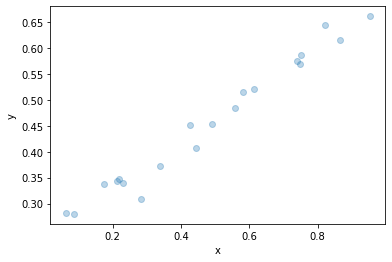

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetRegressão(X, y):
    """
    Plota um dataset de regressão.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:,0], y, "o", alpha=0.3)

plotaDatasetRegressão(Xtr, ytr)

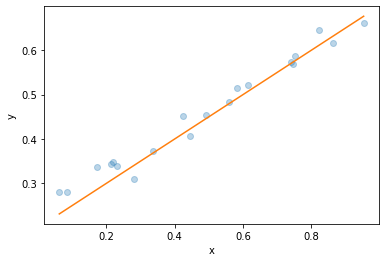

In [3]:
def plotaFunçãoDatasetRegressão(X, y, slop, intercept=0):
    """
    Plota um dataset de regressão com uma função definida por uma
    inclinação e o valor em que este vetor intercepta o eixo vertical.
    """
    xmin = min(X)
    xmax = max(X)
    xs = np.linspace(xmin, xmax, num=2)
    ys = xs * slop+intercept
    plt.plot(xs,ys)

plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, slop, intercept)

In [4]:
def mse(yactual, ypred):
    return sum((yactual - ypred)**2)/len(yactual)

def rmse(yactual, ypred):
    return np.sqrt(mse(yactual, ypred))

0.019644325773686425
[0.23733633 0.45290749]


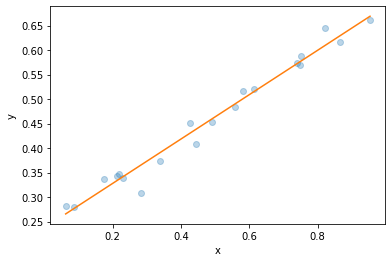

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron para regressão 
    com limite de iterações, treinado em batch, 
    com bias e taxa de aprendizado.
    """
    def __init__(self, max_iter=100, learning_rate=0.05):
        self.w = None
        self.activation = lambda a: a
        self.max_iter = max_iter
        self.learning_rate = learning_rate
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += (Xb.T @ erros) * self.learning_rate

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = Xb @ self.w
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(rmse(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

In [6]:
Xte, yte = criaDatasetRegressão(n=1000, slop=slop, intercept=intercept)

0.03491360178168907


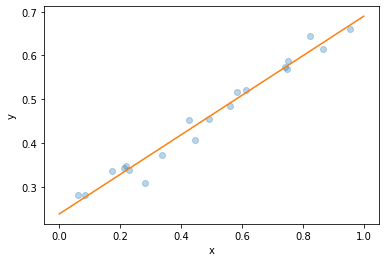

In [7]:
print(rmse(yte, perceptron.predict(Xte)))
plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xte, yte, perceptron.w[1:], perceptron.w[0])